<a href="https://colab.research.google.com/github/2303A52164/AIML_2303A52164/blob/main/Lab07_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries and load data**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the Data
# **We'll use the built in breast cancer dataset from Scikit Learn.**
# **Note the load function:**

In [36]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [37]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

# **We can grab information and arrays out of this dictionary to create data frame and understand the features**

## The description of features are as follows

In [38]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# **Show the feature names**

In [39]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [40]:
import pandas as pd
df = pd.read_csv('/content/breast_cancer_survival.csv')
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


# **Is there any missing data?**

In [41]:
np.sum(pd.isnull(df).sum())

30

# **What does the 'target' data tell from the data set?**

In [42]:
cancer['target'].shape

(569,)

# **Adding the target data to the DataFrame**

In [43]:
df['Cancer'] = pd.DataFrame(cancer['target'])
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Cancer
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive,0
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead,0
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive,0
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive,0
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive,0


# **Exploratory Data Analysis**
# **keyboard_arrow_down**
# **Check the relative counts of benign (0)**
# **vs malignant (1)**
# **cases of cancer**

In [44]:
l =len(df.columns)
l

16

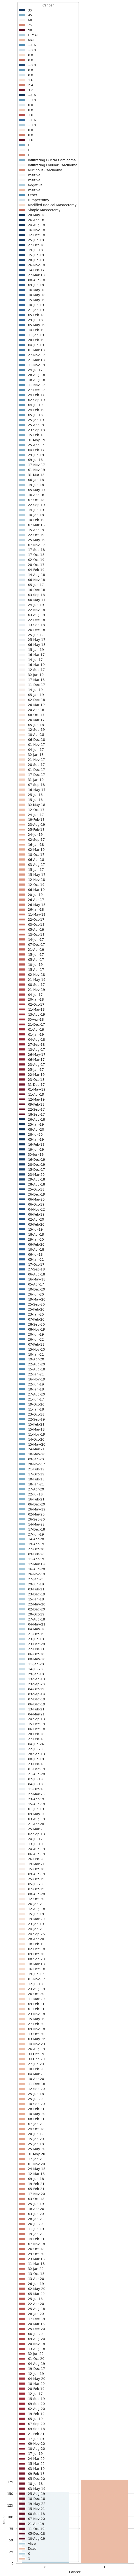

In [45]:
l =len(df.columns)
for i in range(l):
  #sns.set_style('whitegrid')
  sns.countplot(x='Cancer',hue=df.columns[i],data=df,
              palette='RdBu_r',)

# **Draw boxplots of all the mean features**
# (first 10 columns) for '0' and '1' CANCER **OUTCOME**

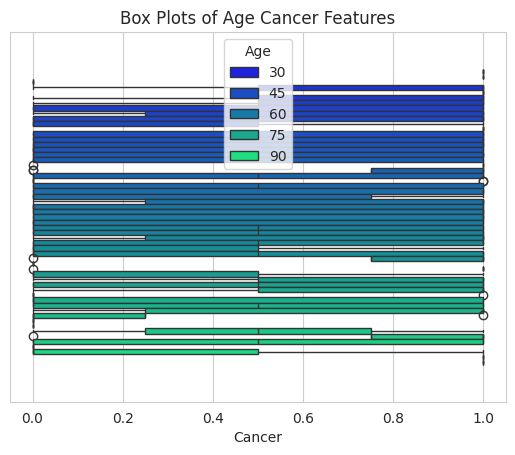

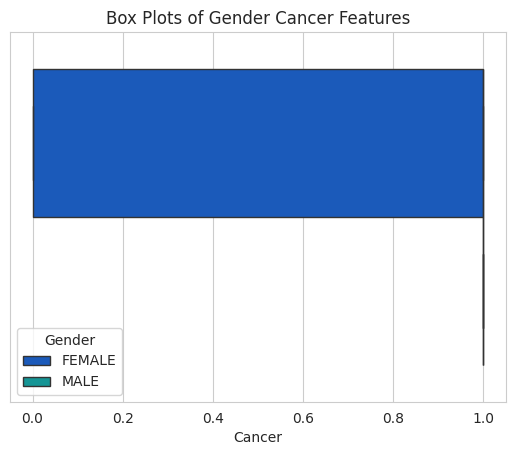

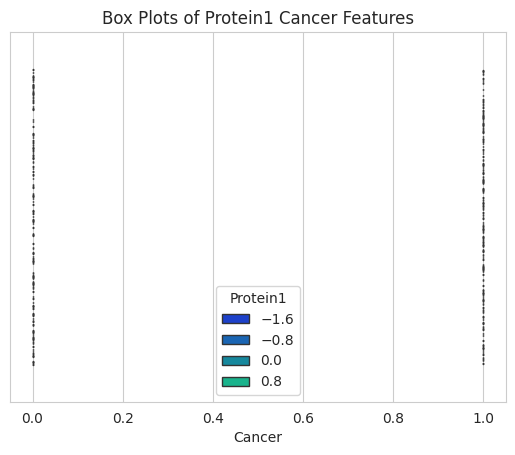

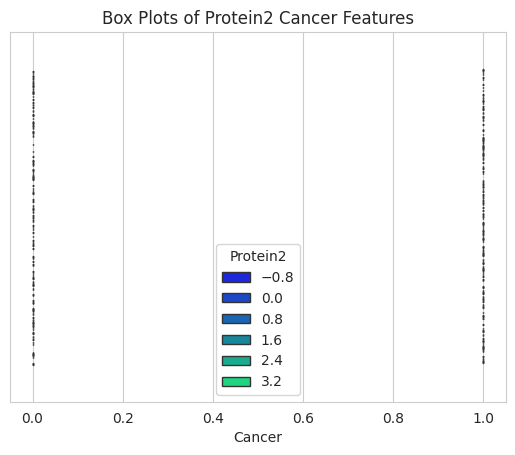

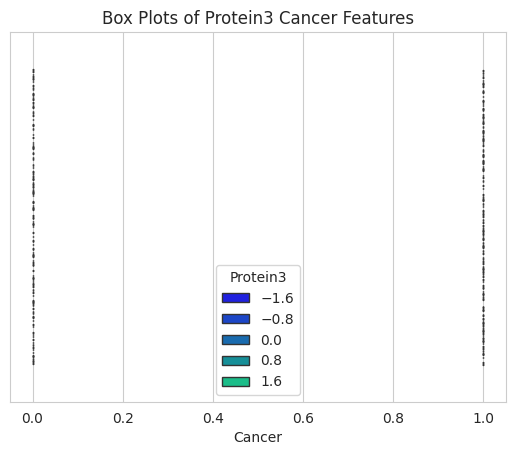

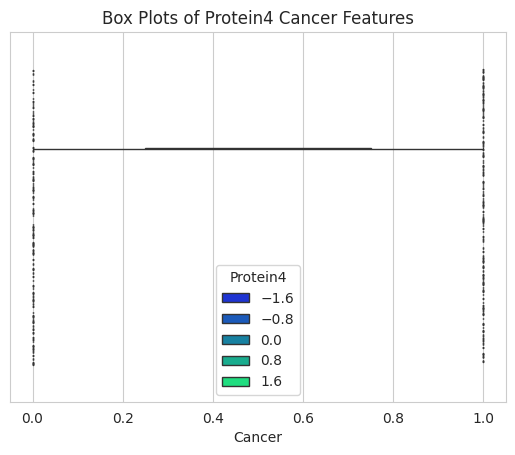

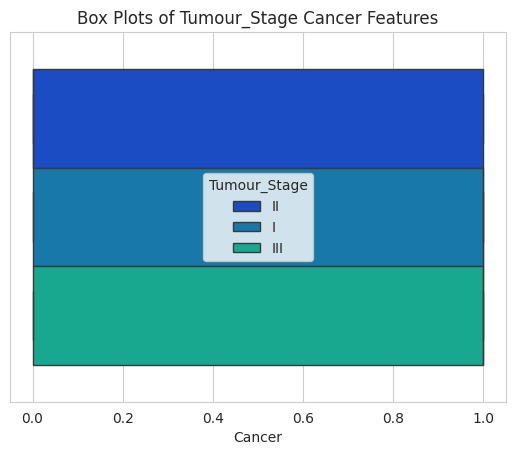

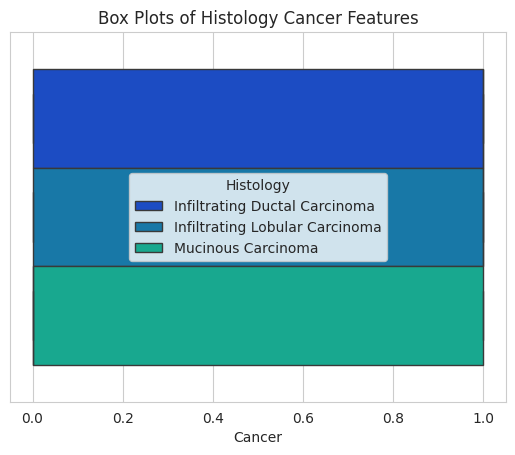

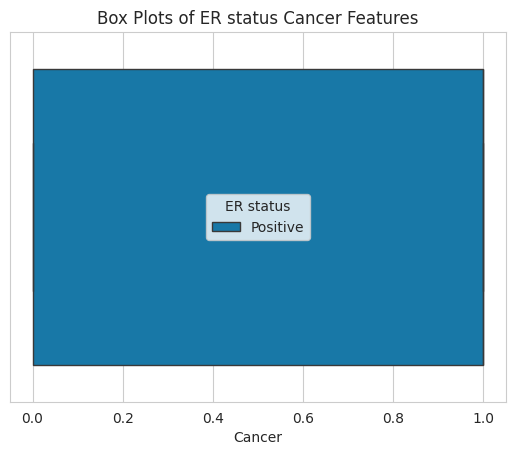

<Figure size 640x480 with 0 Axes>

In [46]:
l=list(df.columns[0:10])
for i in range(len(l)-1):
    sns.boxplot(x='Cancer',hue=l[i], data=df,palette='winter')
    plt.title(f"Box Plots of {l[i]} Cancer Features")
    plt.figure()

# **Not all the features seperate out the cancer predictions equally clearly**
For example, from the following two plots it is clear that smaller
area generally is indicative of positive cancer detection,
while nothing concrete can be said from the plot of mean smoothness

KeyError: 'mean area'

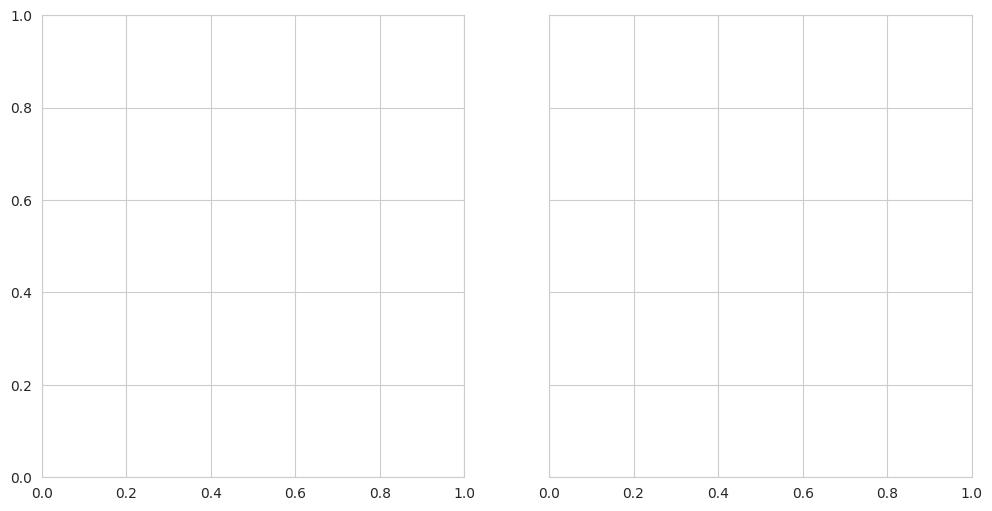

In [52]:
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,6))
ax1.scatter(df['mean area'],df['Cancer'])
ax1.set_title("Cancer Feature mean area", fontsize=15)
ax2.scatter(df['mean smoothness'],df['Cancer'])
ax2.set_title("Cancer Feature mean smoothness",fontsize=15)

# **Training and prediction**
# **keyboard_arrow_down**
# **Train Test Split**

In [51]:
df_feat = df.drop('Cancer',axis=1)
df_feat.shape

(334, 15)

In [50]:
df_target = df['Cancer']
df_target.shape

(334,)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target,test_size=0.20,random_state=101)

In [48]:
df_feat.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((334, 15), (267, 15), (67, 15), (267,), (67,))

# **Train the Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC

In [29]:
model = SVC()